<a href="https://colab.research.google.com/github/Pritam-BA/DAY1/blob/main/DAY15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for professional visualizations
plt.style.use('seaborn-v0_8')
np.random.seed(42)

def create_restaurant_chain_data():
    """Create comprehensive restaurant chain dataset with realistic patterns"""
    n_customers = 1200

    # Major Indian metro cities
    locations = ['Delhi', 'Mumbai', 'Bengaluru']

    # Generate realistic customer data with demographic patterns
    customer_data = pd.DataFrame({
        'customer_id': range(1, n_customers + 1),
        'age': np.random.normal(32, 8, n_customers).clip(18, 65).astype(int),
        'gender': np.random.choice(['Male', 'Female'], n_customers, p=[0.54, 0.46]),
        'location': np.random.choice(locations, n_customers),
        'order_date': pd.to_datetime('2025-01-01') + pd.to_timedelta(
            np.random.randint(0, 180, n_customers), unit='D'
        ),
        'order_value': np.random.lognormal(mean=6.5, sigma=0.8, size=n_customers).round(2)
    })

    # Add realistic constraints
    customer_data['order_value'] = customer_data['order_value'].clip(150, 3000)

    # Extract time features
    customer_data['month'] = customer_data['order_date'].dt.month_name()
    customer_data['quarter'] = customer_data['order_date'].dt.quarter
    customer_data['day_of_week'] = customer_data['order_date'].dt.day_name()

    # Add customer segments based on age
    customer_data['age_segment'] = pd.cut(
        customer_data['age'],
        bins=[0, 25, 35, 50, 100],
        labels=['Gen Z', 'Millennials', 'Gen X', 'Boomers']
    )

    return customer_data

# Create the comprehensive dataset
restaurant_data = create_restaurant_chain_data()
print("Restaurant Chain Dataset Created!")
print(f"Dataset Shape: {restaurant_data.shape}")
print("\nSample Data:")
print(restaurant_data.head())


Restaurant Chain Dataset Created!
Dataset Shape: (1200, 10)

Sample Data:
   customer_id  age  gender   location order_date  order_value  month  \
0            1   35    Male      Delhi 2025-06-15       693.57   June   
1            2   30  Female  Bengaluru 2025-05-07       985.02    May   
2            3   37  Female  Bengaluru 2025-03-29       237.81  March   
3            4   44  Female  Bengaluru 2025-05-07       645.58    May   
4            5   30  Female  Bengaluru 2025-04-30       742.86  April   

   quarter day_of_week  age_segment  
0        2      Sunday  Millennials  
1        2   Wednesday  Millennials  
2        1    Saturday        Gen X  
3        2   Wednesday        Gen X  
4        2   Wednesday  Millennials  


In [2]:
print("\n" + "="*60)
print("=== CUSTOMER DEMOGRAPHIC ANALYSIS ===")
print("="*60)

def analyze_customer_demographics(data):
    """Comprehensive demographic analysis"""

    # Age distribution analysis
    age_stats = data.groupby('location')['age'].agg(['count', 'mean', 'median', 'std']).round(2)
    print("Age Statistics by Location:")
    print(age_stats)

    # Gender distribution across locations
    gender_location = pd.crosstab(data['location'], data['gender'], normalize='index') * 100
    print("\nGender Distribution by Location (%):")
    print(gender_location.round(1))

    # Age segment analysis
    age_segment_dist = pd.crosstab(data['location'], data['age_segment'], normalize='index') * 100
    print("\nAge Segment Distribution by Location (%):")
    print(age_segment_dist.round(1))

    # Spending behavior by demographics
    demo_spending = data.groupby(['location', 'age_segment']).agg({
        'order_value': ['count', 'mean', 'sum'],
        'customer_id': 'nunique'
    }).round(2)
    demo_spending.columns = ['Orders', 'Avg_Order_Value', 'Total_Revenue', 'Unique_Customers']

    print("\nSpending Behavior by Demographics:")
    print(demo_spending)

    return demo_spending

# Perform demographic analysis
demographic_insights = analyze_customer_demographics(restaurant_data)

# Customer lifetime value by segment
clv_analysis = restaurant_data.groupby(['location', 'age_segment']).agg({
    'order_value': ['sum', 'count', 'mean']
}).round(2)
clv_analysis.columns = ['Total_CLV', 'Order_Frequency', 'Avg_Order_Value']

print("\nCustomer Lifetime Value Analysis:")
print(clv_analysis)



=== CUSTOMER DEMOGRAPHIC ANALYSIS ===
Age Statistics by Location:
           count   mean  median   std
location                             
Bengaluru    405  31.91    32.0  7.35
Delhi        402  32.12    32.0  7.74
Mumbai       393  31.72    32.0  7.96

Gender Distribution by Location (%):
gender     Female  Male
location               
Bengaluru    46.7  53.3
Delhi        43.3  56.7
Mumbai       47.3  52.7

Age Segment Distribution by Location (%):
age_segment  Gen Z  Millennials  Gen X  Boomers
location                                       
Bengaluru     20.5         47.7   31.4      0.5
Delhi         21.1         45.0   32.8      1.0
Mumbai        22.6         48.6   27.2      1.5

Spending Behavior by Demographics:
                       Orders  Avg_Order_Value  Total_Revenue  \
location  age_segment                                           
Bengaluru Gen Z            83           880.72       73099.72   
          Millennials     193           831.83      160542.94   
      

In [3]:
print("\n" + "="*60)
print("=== REVENUE TRENDS & SEASONALITY ===")
print("="*60)

def analyze_revenue_trends(data):
    """Comprehensive revenue and trend analysis"""

    # Monthly revenue trends
    monthly_revenue = data.groupby(['location', 'month']).agg({
        'order_value': ['sum', 'mean', 'count']
    }).round(2)
    monthly_revenue.columns = ['Total_Revenue', 'Avg_Order_Value', 'Order_Count']

    print("Monthly Revenue Analysis:")
    print(monthly_revenue.head(10))

    # Calculate growth rates
    location_growth = {}
    for location in data['location'].unique():
        loc_data = monthly_revenue.loc[location].reset_index()
        if len(loc_data) > 1:
            loc_data['Revenue_Growth'] = loc_data['Total_Revenue'].pct_change() * 100
            location_growth[location] = loc_data['Revenue_Growth'].mean()

    print(f"\nAverage Monthly Growth by Location:")
    for loc, growth in location_growth.items():
        print(f"{loc}: {growth:.1f}%")

    # Day-of-week patterns
    daily_patterns = data.groupby(['location', 'day_of_week'])['order_value'].agg(['sum', 'mean', 'count'])
    daily_patterns.columns = ['Total_Revenue', 'Avg_Order_Value', 'Order_Count']

    print("\nDaily Pattern Analysis (Sample):")
    print(daily_patterns.head(10))

    # Seasonal analysis
    quarterly_performance = data.groupby(['location', 'quarter']).agg({
        'order_value': ['sum', 'mean', 'count']
    }).round(2)
    quarterly_performance.columns = ['Total_Revenue', 'Avg_Order_Value', 'Order_Count']

    print("\nQuarterly Performance:")
    print(quarterly_performance)

    return monthly_revenue, daily_patterns, quarterly_performance

# Analyze revenue trends
monthly_data, daily_data, quarterly_data = analyze_revenue_trends(restaurant_data)

# Peak performance identification
peak_analysis = restaurant_data.groupby('location')['order_value'].agg(['sum', 'count', 'mean']).round(2)
peak_analysis.columns = ['Total_Revenue', 'Total_Orders', 'Avg_Order_Value']
peak_analysis['Revenue_Share'] = (peak_analysis['Total_Revenue'] / peak_analysis['Total_Revenue'].sum() * 100).round(1)

print(f"\nLocation Performance Summary:")
print(peak_analysis)



=== REVENUE TRENDS & SEASONALITY ===
Monthly Revenue Analysis:
                    Total_Revenue  Avg_Order_Value  Order_Count
location  month                                                
Bengaluru April          53792.09           827.57           65
          February       41742.25           888.13           47
          January        64836.70           842.04           77
          June           57503.30           858.26           67
          March          74689.65           982.76           76
          May            64975.89           890.08           73
Delhi     April          57668.04           901.06           64
          February       37645.03           684.46           55
          January        53529.01           798.94           67
          June           62774.65           909.78           69

Average Monthly Growth by Location:
Delhi: 9.2%
Bengaluru: 7.7%
Mumbai: -2.8%

Daily Pattern Analysis (Sample):
                       Total_Revenue  Avg_Order_Value  

In [4]:
print("\n" + "="*60)
print("=== LOCATION PERFORMANCE COMPARISON ===")
print("="*60)

def comprehensive_location_analysis(data):
    """Detailed cross-location performance analysis"""

    # Key Performance Indicators (KPIs)
    location_kpis = data.groupby('location').agg({
        'order_value': ['count', 'sum', 'mean', 'median', 'std'],
        'age': 'mean',
        'customer_id': 'nunique'
    }).round(2)

    location_kpis.columns = ['Total_Orders', 'Total_Revenue', 'Avg_Order_Value',
                           'Median_Order_Value', 'Revenue_Volatility', 'Avg_Customer_Age', 'Unique_Customers']

    # Calculate derived metrics
    location_kpis['Revenue_Per_Customer'] = location_kpis['Total_Revenue'] / location_kpis['Unique_Customers']
    location_kpis['Orders_Per_Customer'] = location_kpis['Total_Orders'] / location_kpis['Unique_Customers']
    location_kpis['Market_Share'] = (location_kpis['Total_Revenue'] / location_kpis['Total_Revenue'].sum() * 100).round(1)

    print("Location Performance KPIs:")
    print(location_kpis)

    # Customer loyalty analysis
    customer_frequency = data.groupby(['location', 'customer_id']).size().reset_index(name='visit_count')
    loyalty_metrics = customer_frequency.groupby('location')['visit_count'].agg(['mean', 'median', 'std']).round(2)
    loyalty_metrics.columns = ['Avg_Visits', 'Median_Visits', 'Visit_Consistency']

    print("\nCustomer Loyalty Metrics:")
    print(loyalty_metrics)

    # Performance scoring
    # Normalize metrics for scoring (0-1 scale)
    scoring_metrics = ['Avg_Order_Value', 'Revenue_Per_Customer', 'Orders_Per_Customer']

    performance_scores = location_kpis[scoring_metrics].copy()
    for metric in scoring_metrics:
        performance_scores[f'{metric}_Score'] = (
            performance_scores[metric] / performance_scores[metric].max()
        )

    # Calculate composite score
    performance_scores['Overall_Score'] = (
        performance_scores['Avg_Order_Value_Score'] * 0.4 +
        performance_scores['Revenue_Per_Customer_Score'] * 0.4 +
        performance_scores['Orders_Per_Customer_Score'] * 0.2
    ).round(3)

    print("\nPerformance Rankings:")
    rankings = performance_scores['Overall_Score'].sort_values(ascending=False)
    for i, (location, score) in enumerate(rankings.items(), 1):
        print(f"{i}. {location}: {score:.3f}")

    return location_kpis, loyalty_metrics, performance_scores

# Comprehensive location analysis
kpis, loyalty_data, scores = comprehensive_location_analysis(restaurant_data)

# High-value customer analysis
high_value_threshold = restaurant_data['order_value'].quantile(0.8)
high_value_customers = restaurant_data[restaurant_data['order_value'] > high_value_threshold]

hv_distribution = high_value_customers['location'].value_counts(normalize=True) * 100
print(f"\nHigh-Value Customer Distribution (Top 20%):")
for location, pct in hv_distribution.items():
    print(f"{location}: {pct:.1f}%")



=== LOCATION PERFORMANCE COMPARISON ===
Location Performance KPIs:
           Total_Orders  Total_Revenue  Avg_Order_Value  Median_Order_Value  \
location                                                                      
Bengaluru           405      357539.88           882.81              665.26   
Delhi               402      351088.48           873.35              665.18   
Mumbai              393      343408.12           873.81              630.91   

           Revenue_Volatility  Avg_Customer_Age  Unique_Customers  \
location                                                            
Bengaluru              683.97             31.91               405   
Delhi                  660.26             32.12               402   
Mumbai                 689.56             31.72               393   

           Revenue_Per_Customer  Orders_Per_Customer  Market_Share  
location                                                            
Bengaluru            882.814519                  1.0

In [5]:
print("\n" + "="*60)
print("=== ADVANCED BUSINESS INTELLIGENCE ===")
print("="*60)

def advanced_analytics(data):
    """Advanced analytics for strategic insights"""

    # Customer segmentation analysis
    # RFM-like analysis (Recency, Frequency, Monetary)
    customer_summary = data.groupby('customer_id').agg({
        'order_date': 'max',  # Recency
        'order_value': ['count', 'sum', 'mean']  # Frequency, Monetary
    })
    customer_summary.columns = ['Last_Order_Date', 'Order_Frequency', 'Total_Spent', 'Avg_Order_Value']

    # Calculate recency in days
    customer_summary['Recency_Days'] = (pd.Timestamp.now() - customer_summary['Last_Order_Date']).dt.days

    # Customer value segments
    customer_summary['Value_Segment'] = pd.qcut(
        customer_summary['Total_Spent'],
        q=4,
        labels=['Low Value', 'Medium Value', 'High Value', 'VIP']
    )

    segment_distribution = customer_summary['Value_Segment'].value_counts()
    print("Customer Value Segmentation:")
    print(segment_distribution)

    # Market opportunity analysis
    market_expansion = data.groupby(['location', 'age_segment']).agg({
        'order_value': ['count', 'mean', 'sum']
    }).round(2)
    market_expansion.columns = ['Current_Customers', 'Avg_Spending', 'Revenue_Contribution']

    # Calculate market potential (assuming 20% growth opportunity)
    market_expansion['Growth_Potential'] = (market_expansion['Revenue_Contribution'] * 0.2).round(2)

    print("\nMarket Expansion Opportunities:")
    print(market_expansion)

    # Operational efficiency metrics
    efficiency_metrics = data.groupby('location').agg({
        'order_value': ['count', 'sum'],
        'customer_id': 'nunique'
    })
    efficiency_metrics.columns = ['Orders', 'Revenue', 'Customers']

    # Calculate efficiency ratios
    efficiency_metrics['Revenue_Per_Order'] = (efficiency_metrics['Revenue'] / efficiency_metrics['Orders']).round(2)
    efficiency_metrics['Customer_Acquisition_Efficiency'] = (efficiency_metrics['Revenue'] / efficiency_metrics['Customers']).round(2)

    print("\nOperational Efficiency Metrics:")
    print(efficiency_metrics)

    return customer_summary, market_expansion, efficiency_metrics

# Advanced analytics
customer_segments, market_opportunities, efficiency_data = advanced_analytics(restaurant_data)

# Predictive insights
correlation_analysis = restaurant_data[['age', 'order_value']].corr()
print(f"\nAge-Spending Correlation: {correlation_analysis.iloc[0,1]:.3f}")

# Business health indicators
total_revenue = restaurant_data['order_value'].sum()
total_customers = restaurant_data['customer_id'].nunique()
avg_order_value = restaurant_data['order_value'].mean()

print(f"\n=== KEY BUSINESS METRICS ===")
print(f"📊 Total Revenue: ₹{total_revenue:,.0f}")
print(f"👥 Total Customers: {total_customers:,}")
print(f"💰 Average Order Value: ₹{avg_order_value:.0f}")
print(f"📈 Revenue per Customer: ₹{total_revenue/total_customers:.0f}")



=== ADVANCED BUSINESS INTELLIGENCE ===
Customer Value Segmentation:
Value_Segment
Low Value       300
Medium Value    300
High Value      300
VIP             300
Name: count, dtype: int64

Market Expansion Opportunities:
                       Current_Customers  Avg_Spending  Revenue_Contribution  \
location  age_segment                                                          
Bengaluru Gen Z                       83        880.72              73099.72   
          Millennials                193        831.83             160542.94   
          Gen X                      127        965.21             122581.59   
          Boomers                      2        657.82               1315.63   
Delhi     Gen Z                       85        902.96              76751.49   
          Millennials                181        838.96             151851.33   
          Gen X                      132        911.18             120275.19   
          Boomers                      4        552.62    

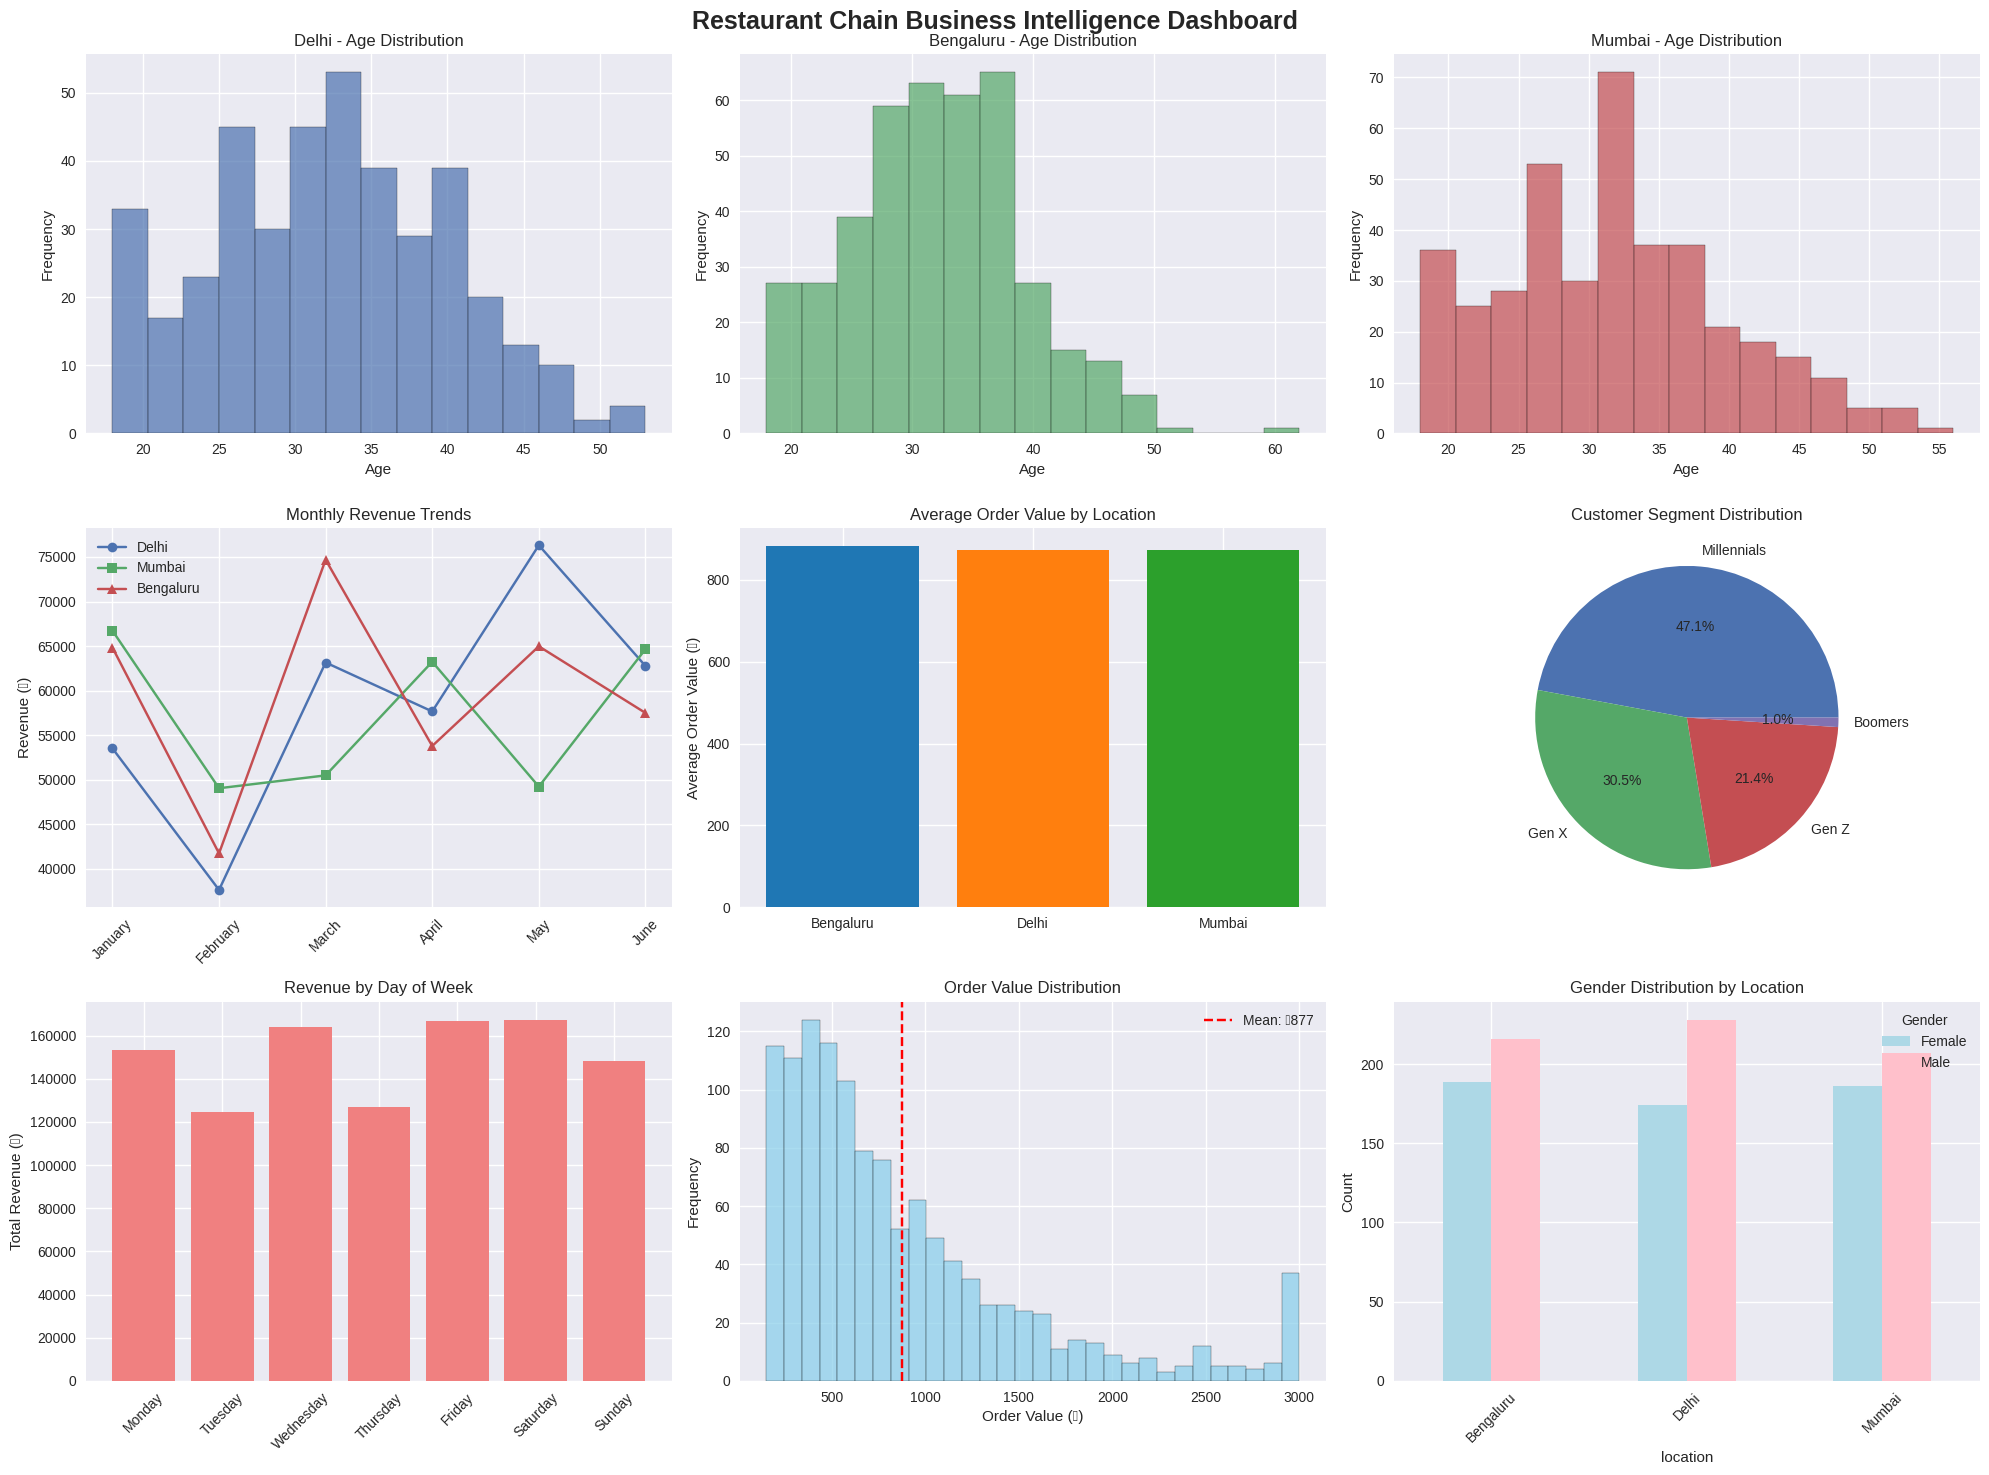

In [6]:
# Create comprehensive business intelligence dashboard
def create_comprehensive_dashboard(data):
    """Generate complete BI dashboard"""

    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    fig.suptitle('Restaurant Chain Business Intelligence Dashboard', fontsize=18, fontweight='bold')

    # 1. Age Distribution by Location
    for i, location in enumerate(data['location'].unique()):
        location_data = data[data['location'] == location]
        axes[0, i].hist(location_data['age'], bins=15, alpha=0.7, color=f'C{i}', edgecolor='black')
        axes[0, i].set_title(f'{location} - Age Distribution')
        axes[0, i].set_xlabel('Age')
        axes[0, i].set_ylabel('Frequency')

    # 2. Monthly Revenue Trends
    monthly_pivot = data.pivot_table(values='order_value', index='month', columns='location', aggfunc='sum')
    month_order = ['January', 'February', 'March', 'April', 'May', 'June']
    monthly_pivot = monthly_pivot.reindex(month_order)

    axes[1, 0].plot(monthly_pivot.index, monthly_pivot['Delhi'], marker='o', label='Delhi')
    axes[1, 0].plot(monthly_pivot.index, monthly_pivot['Mumbai'], marker='s', label='Mumbai')
    axes[1, 0].plot(monthly_pivot.index, monthly_pivot['Bengaluru'], marker='^', label='Bengaluru')
    axes[1, 0].set_title('Monthly Revenue Trends')
    axes[1, 0].set_ylabel('Revenue (₹)')
    axes[1, 0].legend()
    axes[1, 0].tick_params(axis='x', rotation=45)

    # 3. Average Order Value by Location
    avg_order_by_location = data.groupby('location')['order_value'].mean()
    axes[1, 1].bar(avg_order_by_location.index, avg_order_by_location.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    axes[1, 1].set_title('Average Order Value by Location')
    axes[1, 1].set_ylabel('Average Order Value (₹)')

    # 4. Customer Segment Distribution
    segment_dist = data['age_segment'].value_counts()
    axes[1, 2].pie(segment_dist.values, labels=segment_dist.index, autopct='%1.1f%%')
    axes[1, 2].set_title('Customer Segment Distribution')

    # 5. Revenue Distribution by Day of Week
    daily_revenue = data.groupby('day_of_week')['order_value'].sum()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_revenue = daily_revenue.reindex(day_order)

    axes[2, 0].bar(daily_revenue.index, daily_revenue.values, color='lightcoral')
    axes[2, 0].set_title('Revenue by Day of Week')
    axes[2, 0].set_ylabel('Total Revenue (₹)')
    axes[2, 0].tick_params(axis='x', rotation=45)

    # 6. Order Value Distribution
    axes[2, 1].hist(data['order_value'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[2, 1].axvline(data['order_value'].mean(), color='red', linestyle='--',
                      label=f'Mean: ₹{data["order_value"].mean():.0f}')
    axes[2, 1].set_title('Order Value Distribution')
    axes[2, 1].set_xlabel('Order Value (₹)')
    axes[2, 1].set_ylabel('Frequency')
    axes[2, 1].legend()

    # 7. Gender Distribution by Location
    gender_crosstab = pd.crosstab(data['location'], data['gender'])
    gender_crosstab.plot(kind='bar', ax=axes[2, 2], color=['lightblue', 'pink'])
    axes[2, 2].set_title('Gender Distribution by Location')
    axes[2, 2].set_ylabel('Count')
    axes[2, 2].tick_params(axis='x', rotation=45)
    axes[2, 2].legend(title='Gender')

    plt.tight_layout()
    plt.show()

# Generate the comprehensive dashboard
create_comprehensive_dashboard(restaurant_data)
